#  <center> Prueba Tecnica Conhintec</center>
## <center> Main: Breast Cancer Solution</center>
### <center>Autor:<center>
#### <center>Sebastian Carvalho Salazar<center>


Modelando...
0.943828598043782
RandomForestClassifier(max_depth=4, n_estimators=200, n_jobs=-1)
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       125
           1       0.96      0.93      0.95        75

    accuracy                           0.96       200
   macro avg       0.96      0.95      0.96       200
weighted avg       0.96      0.96      0.96       200



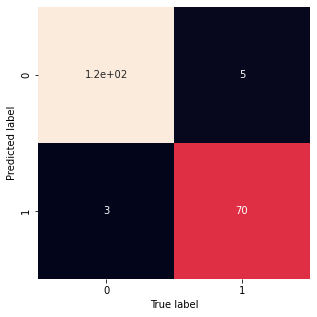

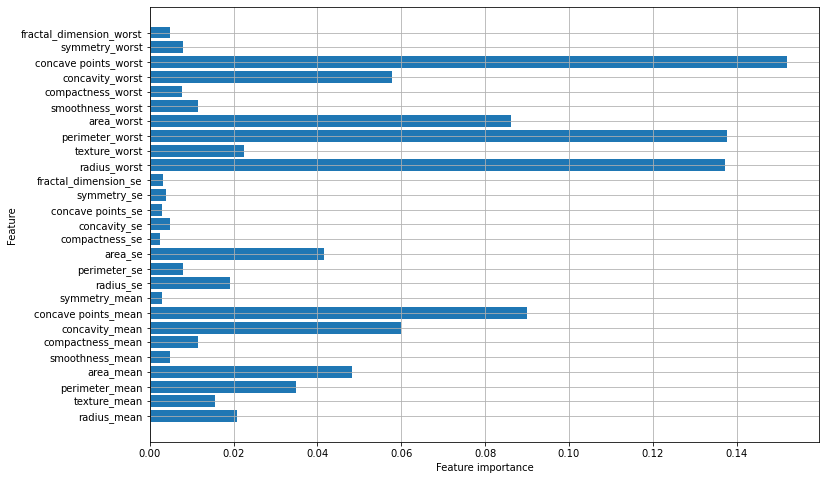

In [60]:
%run utils.ipynb
%run models.ipynb

utils = Utils()
models = Models()

data = utils.load_from_csv('../in/df_filtered_reduced.csv')
print("Modelando...")
print("="*100)

X, y = utils.features_target(data, ['diagnosis', 'Unnamed: 0'], ['diagnosis'])

grid_reg = models.grid_training(X, y)

models.model_results(X, y, grid_reg)

#  <center>Análisis de Resultados</center>